캐글에서 제공되는 Student mental health analysis 데이터셋
  - 정신건강에 영향을 주는 요인은 무엇인가?
  - 데이터를 탐색
    - 속성탐색
    - 결측치 처리
    - 이상치 처리
  - 데이터 시각화
    - 속성간의 관계
    - 속성값의 분포
  - 중요 속성 추출
    - 원핫인코딩
    - 중요속성 추출

In [1]:
!unzip '/content/student_health.zip'

Archive:  /content/student_health.zip
  inflating: Student Mental health.csv  


In [41]:
import pandas as pd
df = pd.read_csv('/content/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [42]:
df.info()
# 결측치 여부
# 데이터 타입(범부형,수치형)
# 숫자인데.. object로 되어 있으면.. 뭔가 문자가 포함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

데이터 전처리

In [43]:
df.columns = ['date','gender','age','course','year','CGPA','Marital_status','Depression','Anxiety','Panic','treatment']

In [44]:
df.year.unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [45]:
mask = {
  'year 1':1,
  'year 2':2,
  'Year 1':1,
  'year 3':3,
  'year 4':4,
  'Year 2':2,
  'Year 3':3
}
df['year'] = df.year.map(mask)

In [46]:
df.describe(include='all')

,date,gender,age,course,year,CGPA,Marital_status,Depression,Anxiety,Panic,treatment
count,101,101,100.00000,101,101.000000,101,101,101,101,101,101
unique,92,2,NaN,49,NaN,6,2,2,2,2,2
top,8/7/2020 12:39,Female,NaN,BCS,NaN,3.50 - 4.00,No,No,No,No,No
freq,3,75,NaN,18,NaN,47,85,66,67,68,95
mean,NaN,NaN,20.53000,NaN,1.970297,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.49628,NaN,0.994540,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.00000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.00000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,19.00000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.00000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['CGPA'] = df['CGPA'].str.strip()

In [48]:
data = df['course'].unique()
data

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

같은의미의 문자열
  - 유사도 측정
  - 클러스터링 알고리즘(K-Means)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [62]:
data = df['course'].unique()

# TF-IDF 백터화
vectorizer =  TfidfVectorizer()
X = vectorizer.fit_transform(data)
kmeans = KMeans()
kmeans.fit(X)
# 클러스터링 결과 출력
for i in range(len(np.unique(kmeans.labels_))):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_strings = [data[idx] for idx in cluster_indices]
  print(f"cluster {i+1} : {cluster_strings}")

cluster 1 : ['Islamic Education']
cluster 2 : ['Engineering', 'BIT', 'Law', 'Mathemathics', 'Pendidikan Islam', 'BCS', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'KOE', 'Banking Studies', 'KIRKHS', 'Usuluddin ', 'Engine', 'ALA', 'BENL', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Biotechnology', 'Communication ', 'Fiqh', 'Nursing ']
cluster 3 : ['Radiography']
cluster 4 : ['Business Administration']
cluster 5 : ['TAASL']
cluster 6 : ['Marine science', 'Biomedical science']
cluster 7 : ['Diploma Nursing', 'DIPLOMA TESL']
cluster 8 : ['Human Resources', 'Human Sciences ']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
mask = {
    'Fiqh fatwa ':'Fiqh',
    'Benl':'BENL',
    'Kirkhs':'KIRKHS',
    'psychology':'Psychology',
    'Pendidikan islam':'Pendidikan Islam',
    'Pendidikan Islam ':'Pendidikan Islam',
    'koe':'KOE',
    'Koe':'KOE',
    'Islamic education':'Islamic Education',
    'Laws':'Law',
}
df['course'] = df['course'].replace(mask)

In [53]:
# mask = {
#     'Islamic education':'Islamic Education',
# }
# df['course'] = df['course'].replace(mask)

In [60]:
# mask = {
#     'Laws':'Law',
# }
# df['course'] = df['course'].replace(mask)

In [61]:
df['course'].unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'KIRKHS',
       'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science',
       'BENL', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop',
       'Human Sciences ', 'Biotechnology', 'Communication ',
       'Diploma Nursing', 'Radiography', 'Fiqh', 'DIPLOMA TESL',
       'Nursing '], dtype=object)

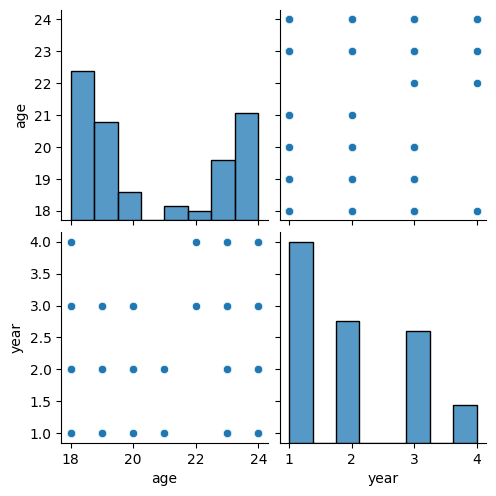

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()